**IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA PREPERATION**

In [7]:
#data collection
#loading dataset into pandas dataframe
train_df = pd.read_csv(r'/content/drive/MyDrive/PHD/train.csv')

In [8]:
train_df.head(15)

,id,title,author,text,label
0,1,L'Internet est sans fin,Pierre Lemoine,"L'Internet est vaste, mais il n'est pas infini...",1
1,2,Les poissons peuvent respirer hors de l'eau,François Lefevre,Les poissons respirent grâce aux branchies et ...,1
2,3,La terre est stationnaire,Michel Lefevre,"La Terre tourne autour du soleil, contrairemen...",1
3,4,Les chiens peuvent voler,Sophie Durand,"Les chiens ne peuvent pas voler, ils sont des ...",1
4,5,Les gorilles sont végétariens,Jérôme Boucher,"Les gorilles sont principalement herbivores, b...",0
5,6,Les pyramides d'Égypte ont été construites par...,Claude Marais,Les pyramides ont été construites par les anci...,1
6,7,La gravité est un mythe,Lucien Picard,La gravité est une force bien documentée qui a...,1
7,8,Les abeilles produisent du miel,Pierre Moreau,Les abeilles produisent du miel à partir du ne...,0
8,9,La Terre est plate,Maxime Durant,"La Terre est ronde, comme l'a prouvé la scienc...",1
9,10,Les ordinateurs sont infaillibles,Caroline Delacour,Les ordinateurs peuvent rencontrer des erreurs...,1


In [9]:
#deleting unwanted columns
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [10]:
train_df.shape

(200, 2)

In [11]:
train_df.head(15)

,text,label
0,"L'Internet est vaste, mais il n'est pas infini...",1
1,Les poissons respirent grâce aux branchies et ...,1
2,"La Terre tourne autour du soleil, contrairemen...",1
3,"Les chiens ne peuvent pas voler, ils sont des ...",1
4,"Les gorilles sont principalement herbivores, b...",0
5,Les pyramides ont été construites par les anci...,1
6,La gravité est une force bien documentée qui a...,1
7,Les abeilles produisent du miel à partir du ne...,0
8,"La Terre est ronde, comme l'a prouvé la scienc...",1
9,Les ordinateurs peuvent rencontrer des erreurs...,1


In [12]:
train_df.isna().sum()

,0
text,0
label,0


<ipython-input-13-c9e58442f9da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

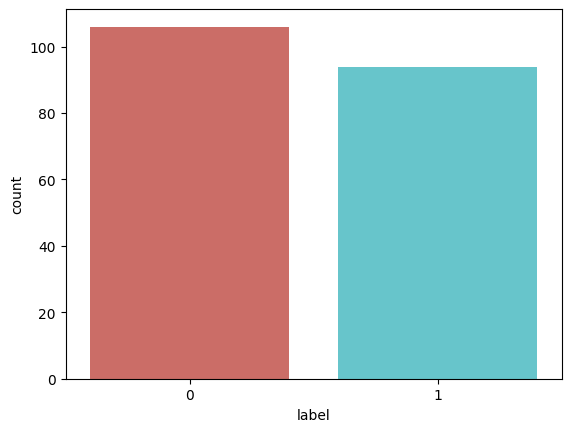

In [13]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [14]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    200 non-null    object
 1   label   200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB
check finished.


In [15]:
train_df = train_df.dropna()

In [16]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    200 non-null    object
 1   label   200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB
check finished.


In [17]:
train_df.shape

(200, 2)

In [18]:
train_df.head(10)

,text,label
0,"L'Internet est vaste, mais il n'est pas infini...",1
1,Les poissons respirent grâce aux branchies et ...,1
2,"La Terre tourne autour du soleil, contrairemen...",1
3,"Les chiens ne peuvent pas voler, ils sont des ...",1
4,"Les gorilles sont principalement herbivores, b...",0
5,Les pyramides ont été construites par les anci...,1
6,La gravité est une force bien documentée qui a...,1
7,Les abeilles produisent du miel à partir du ne...,0
8,"La Terre est ronde, comme l'a prouvé la scienc...",1
9,Les ordinateurs peuvent rencontrer des erreurs...,1


In [19]:
train_df.reset_index(drop= True,inplace=True)

In [20]:
train_df.head(10)

,text,label
0,"L'Internet est vaste, mais il n'est pas infini...",1
1,Les poissons respirent grâce aux branchies et ...,1
2,"La Terre tourne autour du soleil, contrairemen...",1
3,"Les chiens ne peuvent pas voler, ils sont des ...",1
4,"Les gorilles sont principalement herbivores, b...",0
5,Les pyramides ont été construites par les anci...,1
6,La gravité est une force bien documentée qui a...,1
7,Les abeilles produisent du miel à partir du ne...,0
8,"La Terre est ronde, comme l'a prouvé la scienc...",1
9,Les ordinateurs peuvent rencontrer des erreurs...,1


In [21]:
label_train = train_df.label

In [22]:
label_train.head(10)

,label
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1


In [23]:
train_df = train_df.drop("label", axis = 1)

In [24]:
train_df.head(10)

,text
0,"L'Internet est vaste, mais il n'est pas infini..."
1,Les poissons respirent grâce aux branchies et ...
2,"La Terre tourne autour du soleil, contrairemen..."
3,"Les chiens ne peuvent pas voler, ils sont des ..."
4,"Les gorilles sont principalement herbivores, b..."
5,Les pyramides ont été construites par les anci...
6,La gravité est une force bien documentée qui a...
7,Les abeilles produisent du miel à partir du ne...
8,"La Terre est ronde, comme l'a prouvé la scienc..."
9,Les ordinateurs peuvent rencontrer des erreurs...


In [26]:
train_df['text'][120]

'Bien que le sable du désert puisse être chaud en journée, il peut devenir froid la nuit, car il ne retient pas bien la chaleur.'

**PRE PROCESSING OF DATA**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**LEMMATIZATION**

Lemmatization is the process of reducing words to their base or dictionary form, known as the "lemma."
In natural language processing (NLP), lemmatization is an important technique used to normalize text data by removing 			  inflections, conjugations, and other variations of a word to bring them to their root form.

         example:the word "cats" can be lemmatized to "cat",
		 	    "running" to "run",
		 	    "am" to "be"
		 	    "ate" to "eat"
Lemmatization is similar to stemming, but it produces more accurate results because it takes into account the context of the 			word in a sentence and uses more advanced linguistic analysis to identify the base form.
Lemmatization can improve the accuracy of text analysis and machine learning models that rely on text data.

In [36]:
#lemmatization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')


for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-36-855861133d01>:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the c

In [38]:
train_df['text'][199]

'crocodile peuvent vivre fois habitat marins deau douce capables sadapter diffrents environnements'

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:**

In [39]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=0)

In [40]:
X_train

,text
134,lion vivent principalement afrique trouve gale...
66,cheveux continuent pousser apr mort peuvent se...
26,champignons organismes distincts plantes appar...
113,grenouilles capacits saut exceptionnelles fonc...
168,colza plante cultive principalement graines ut...
...,...
67,lait riche calcium existe dautres source comme...
192,chocolat noir contient moins sucre chocolat la...
117,oiseaux vision couleurs bien plus dveloppe cel...
47,plantes produisent loxygne pendant photosynths...


In [41]:
X_train.shape

(160,)

In [42]:
Y_train

,label
134,0
66,1
26,0
113,1
168,0
...,...
67,0
192,0
117,1
47,0


**CONVERTING THE TEXTUAL DATA TO NUMERICAL DATA**

converting to textual data into numerical data/feature vector

1)**tf (term freequency)**:-which counts the number of time a perticular words is repearting in a documents.

2)**idf (inverse document freequency)**:-Measure the word is a rare word or common word in a document

In [43]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [44]:
print(tfidf_X_train,tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1873 stored elements and shape (160, 1005)>
  Coords	Values
  (0, 495)	0.26614761114162755
  (0, 992)	0.21404437746396093
  (0, 712)	0.18364275864195143
  (0, 14)	0.29654922996363703
  (0, 952)	0.3206803523835574
  (0, 370)	0.23817549988388126
  (0, 45)	0.29654922996363703
  (0, 813)	0.3206803523835574
  (0, 646)	0.3206803523835574
  (0, 589)	0.3206803523835574
  (0, 378)	0.3206803523835574
  (0, 424)	0.3206803523835574
  (1, 137)	0.32488734071972053
  (1, 195)	0.2830937261033937
  (1, 701)	0.3004396433995777
  (1, 39)	0.3004396433995777
  (1, 569)	0.32488734071972053
  (1, 668)	0.1371565634985637
  (1, 844)	0.32488734071972053
  (1, 684)	0.17259741940695858
  (1, 504)	0.32488734071972053
  (1, 106)	0.26963918737150294
  (1, 294)	0.32488734071972053
  (1, 657)	0.3004396433995777
  (2, 126)	0.36534740204634597
  :	:
  (157, 518)	0.26885254162820205
  (158, 677)	0.2788332395463375
  (158, 913)	0.25400547272247537
  (158, 513)	

In [45]:
tfidf_X_train.shape

(160, 1005)

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

**ACCURACY SCORE & CONFUSION MATRIX**

Accuracy: 72.5%
Confusion matrix, without normalization


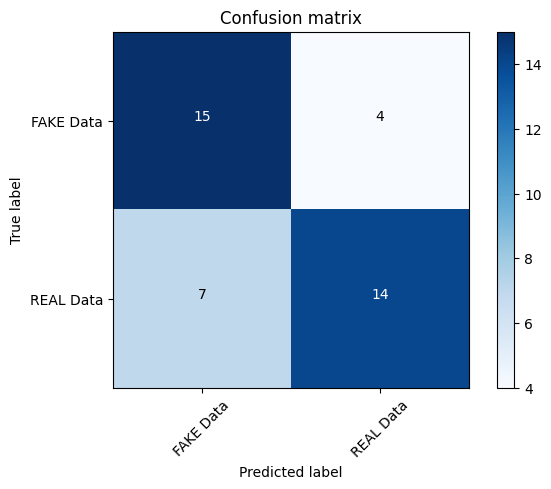

In [49]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**CLASSIFICATION REPORT**

In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.78      0.67      0.72        21

    accuracy                           0.72        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.73      0.72      0.72        40



**SAVING & LOADING MODEL**

In [51]:
#pickling the model into disk
pickle.dump(classifier,open('./yak.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

In [52]:
# load the model from disk
loaded_model = pickle.load(open('./yak.pkl', 'rb'))
#vector_form = pickle.load(open('vector.pkl', 'rb'))

**BUILDING A PREDICTIVE SYSTEM**

In [58]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")


In [59]:
X_test

,text
18,lhumain peut respirer sou leau sans quipement ...
170,grenouilles peuvent respirer fois leurs poumon...
107,sucre peut tre bnfique petite quantits fournir...
98,tortues marine peuvent retenir souffle sou lea...
177,chocolat fabriqu partir fves cacao contient ga...
182,hirondelles migrent vers rgions plus chaudes p...
5,pyramides construites anciens gyptiens grce le...
146,foudre peut frapper plusieurs fois mme endroit...
12,serpent volent certaines espces peuvent planer...
152,serpent peuvent sauter dplacent ondulant sol c...


In [65]:
Y_test

,label
18,1
170,0
107,1
98,1
177,1
182,0
5,1
146,1
12,1
152,1


In [66]:
Y_test[123]

np.int64(1)

In [67]:
X_test[177]

'chocolat fabriqu partir fves cacao contient galement sucre lait dautres ingrdients selon type chocolat'

In [69]:
news=str(input("Enter the News:"))
fake_news_det(news)

Enter the News:Les pandas ne mangent que du bambou
Prediction of the News :  Looking Fake⚠ News📰 


**MANUAL PREDICTION**

In [70]:
print(tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 312 stored elements and shape (40, 1005)>
  Coords	Values
  (0, 162)	0.22997932464052967
  (0, 468)	0.2662968028158762
  (0, 667)	0.24165296559486368
  (0, 747)	0.4080460742117341
  (0, 787)	0.32484951990329897
  (0, 824)	0.31317587894896487
  (0, 830)	0.4080460742117341
  (0, 869)	0.33865650664272096
  (0, 956)	0.4080460742117341
  (1, 318)	0.36486693611383053
  (1, 351)	0.31793033316586666
  (1, 403)	0.36486693611383053
  (1, 475)	0.26301802789427275
  (1, 657)	0.33741078347803355
  (1, 659)	0.33741078347803355
  (1, 668)	0.1540346108308225
  (1, 787)	0.29047418053006974
  (1, 893)	0.33741078347803355
  (1, 915)	0.33741078347803355
  (2, 76)	0.3230712885472939
  (2, 162)	0.1820865864091083
  (2, 184)	0.24795762328906104
  (2, 313)	0.3230712885472939
  (2, 330)	0.24795762328906104
  (2, 499)	0.3230712885472939
  :	:
  (37, 70)	0.20277004509001756
  (37, 389)	0.39741641566403113
  (37, 411)	0.3675109222130192
  (37, 429)	0.3

In [71]:
print(Y_test)

18     1
170    0
107    1
98     1
177    1
182    0
5      1
146    1
12     1
152    1
61     1
125    0
180    0
154    0
80     1
7      0
33     0
130    1
37     1
74     0
183    0
145    0
45     1
159    1
60     0
123    1
179    0
185    0
122    0
44     0
16     1
55     1
150    1
111    0
22     0
189    0
129    1
4      0
83     1
106    1
Name: label, dtype: int64


In [73]:
X_new=tfidf_X_test[3]
prediction = loaded_model.predict(X_new)

if (prediction[0] == 1):
	print("Prediction of the News :  Looking Fake News ")
else:
	print("Prediction of the News : Looking Real News ")

Prediction of the News :  Looking Fake News 


In [75]:
print(Y_test[185])

0
